# Cardiovascular Disease 
Predict the presence cardiovascular disease

This project aims to explore the different features that might increase or affect the chance of cardiovascular disease 
occurrence and then build a model to predict whether a person has a cardiovascular disease or not.

To start exploring this goal, I used a logistic regression model with 10 features to determine whether a person is at risk of cardiovascular disease or not.
the following outputs is answering the question.

## 1. Data Acquisition

In [1]:
# first I imported all the needed packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


In [2]:
# I read the data from my repo

Cardio_Disease = pd.read_csv('https://raw.githubusercontent.com/ShahdOmarAljabarti/Data_Science_Bootcamp/main/Data/Cardio_Disease.csv')

## 2. Data Understanding & Cleansing

#### Features:

- Age | int (days)
- Height | int (cm)
- Weight | float (kg) 
- Gender | 1 women, 2 men
- Systolic blood pressure | int
- Diastolic blood pressure | int
- Cholesterol | 1: normal, 2: above normal, 3: well above normal
- Glucose | 1: normal, 2: above normal, 3: well above normal
- Smoking | binary 
- Alcohol intake | binary 
- Physical activity | binary 
- Cardiovascular disease presence | binary 

In [3]:
Cardio_Disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       69996 non-null  float64
 4   weight       70000 non-null  float64
 5   ap_hi        69997 non-null  float64
 6   ap_lo        69999 non-null  float64
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        69999 non-null  float64
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 6.9 MB


In [4]:
# the following command shows the missing data in each column
Cardio_Disease.isna().sum()

id             0
age            0
gender         0
height         4
weight         0
ap_hi          3
ap_lo          1
cholesterol    0
gluc           0
smoke          1
alco           0
active         0
cardio         0
dtype: int64

In [5]:
Cardio_Disease.shape

(70000, 13)

In [6]:
Cardio_Disease.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168.0,62.0,110.0,80.0,1,1,0.0,0,1,0
1,1,20228,1,156.0,85.0,140.0,90.0,3,1,0.0,0,1,1
2,2,18857,1,165.0,64.0,130.0,70.0,3,1,0.0,0,0,1
3,3,17623,2,169.0,82.0,150.0,100.0,1,1,0.0,0,1,1
4,4,17474,1,156.0,56.0,100.0,60.0,1,1,0.0,0,0,0


#### - rename some columns to understandable names 

In [7]:
Cardio_Disease.rename(columns={
    'age' : 'age_days',
    'ap_hi' : 'Systolic_blood_pressure',
    'ap_lo' : 'Diastolic_blood_pressure',
    'alco' : 'Alcohol_intake',
    'active' : 'Physical_activity',
    'cardio' : 'cardio_disease_presence',
    'gluc' : 'Glucose'
}, inplace = True)
Cardio_Disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        70000 non-null  int64  
 1   age_days                  70000 non-null  int64  
 2   gender                    70000 non-null  int64  
 3   height                    69996 non-null  float64
 4   weight                    70000 non-null  float64
 5   Systolic_blood_pressure   69997 non-null  float64
 6   Diastolic_blood_pressure  69999 non-null  float64
 7   cholesterol               70000 non-null  int64  
 8   Glucose                   70000 non-null  int64  
 9   smoke                     69999 non-null  float64
 10  Alcohol_intake            70000 non-null  int64  
 11  Physical_activity         70000 non-null  int64  
 12  cardio_disease_presence   70000 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 6.9 MB


In [8]:
Cardio_Disease.shape

(70000, 13)

In [9]:
Cardio_Disease.drop_duplicates().shape

(70000, 13)

#### - Fill the null values & drop rows with missing value

In [10]:
Cardio_Disease.height = Cardio_Disease.height.fillna(round(Cardio_Disease.height.mean()))
Cardio_Disease.Systolic_blood_pressure = Cardio_Disease.Systolic_blood_pressure.fillna(Cardio_Disease.Systolic_blood_pressure.mean())
Cardio_Disease.Diastolic_blood_pressure = Cardio_Disease.Diastolic_blood_pressure.fillna(Cardio_Disease.Diastolic_blood_pressure.mean())
Cardio_Disease.shape

(70000, 13)

In [11]:
# drop the rows where the smoke columns contain NAN
Cardio_Disease.dropna(subset=['smoke'], inplace = True)
Cardio_Disease.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        69999 non-null  int64  
 1   age_days                  69999 non-null  int64  
 2   gender                    69999 non-null  int64  
 3   height                    69999 non-null  float64
 4   weight                    69999 non-null  float64
 5   Systolic_blood_pressure   69999 non-null  float64
 6   Diastolic_blood_pressure  69999 non-null  float64
 7   cholesterol               69999 non-null  int64  
 8   Glucose                   69999 non-null  int64  
 9   smoke                     69999 non-null  float64
 10  Alcohol_intake            69999 non-null  int64  
 11  Physical_activity         69999 non-null  int64  
 12  cardio_disease_presence   69999 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 7.5 MB


#### - calculate the age in years 

In [12]:
# I converted the ages from days to years for easier reading 
def Days_to_Years(x):
    return (x/365.25)

Cardio_Disease['age_years'] = Cardio_Disease.age_days.apply(Days_to_Years)
Cardio_Disease['age_years'] = Cardio_Disease.age_years.astype('int')

In [13]:
# this code shows how many record of each age
Cardio_Disease['age_years'].value_counts()

55    4225
53    4166
57    3987
59    3844
49    3664
51    3601
54    3309
56    3307
58    3110
52    3043
50    2971
63    2937
60    2933
61    2932
47    2303
45    2214
43    2137
41    2004
62    1991
64    1986
39    1880
48    1705
40    1524
46    1499
44    1408
42    1315
29       3
30       1
Name: age_years, dtype: int64

#### - drop the id column 

In [14]:
Cardio_Disease.drop(["id"],axis=1, inplace = True)
Cardio_Disease.drop(["age_days"],axis=1, inplace = True)

In [15]:
Cardio_Disease.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    69999 non-null  int64  
 1   height                    69999 non-null  float64
 2   weight                    69999 non-null  float64
 3   Systolic_blood_pressure   69999 non-null  float64
 4   Diastolic_blood_pressure  69999 non-null  float64
 5   cholesterol               69999 non-null  int64  
 6   Glucose                   69999 non-null  int64  
 7   smoke                     69999 non-null  float64
 8   Alcohol_intake            69999 non-null  int64  
 9   Physical_activity         69999 non-null  int64  
 10  cardio_disease_presence   69999 non-null  int64  
 11  age_years                 69999 non-null  int32  
dtypes: float64(5), int32(1), int64(6)
memory usage: 6.7 MB


In [16]:
Cardio_Disease.describe()

,gender,height,weight,Systolic_blood_pressure,Diastolic_blood_pressure,cholesterol,Glucose,smoke,Alcohol_intake,Physical_activity,cardio_disease_presence,age_years
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,1.349576,164.359277,74.204950,128.817075,96.630747,1.366862,1.226446,0.088130,0.053772,0.803726,0.499693,52.803140
std,0.476840,8.210033,14.394528,154.012486,188.473864,0.680251,0.572267,0.283486,0.225569,0.397181,0.500003,6.762439
min,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000
75%,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000


#### - the average age for heart disease presence and no presence 

In [17]:
Cardio_Disease.groupby('cardio_disease_presence')[['age_years']].mean()

,age_years
cardio_disease_presence,
0,51.195112
1,54.413145


In [18]:
Cardio_Disease.age_years.max()

64

#### Discover the height column

<AxesSubplot:xlabel='height', ylabel='weight'>

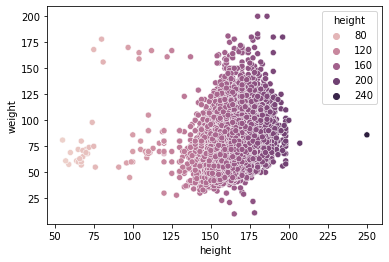

In [19]:
sns.scatterplot( data =Cardio_Disease, x = 'height',y = 'weight', hue = 'height')

The scatter plot above shows unreasonable data for the height column! there're height equal 250 and other less than 75! 
And these heights don't make sense! and I consider it as anomalies! 

In [20]:
# I decided to get rid of all the heights that less than 130 and higher than 220

Cardio_Disease.drop(Cardio_Disease[Cardio_Disease['height'] < 130].index, inplace = True)
Cardio_Disease.drop(Cardio_Disease[Cardio_Disease['height'] > 220].index, inplace = True)

#### here is the dataset after filtering & it looks pretty normal 

In [21]:
# let's clean the weight anamolies 
Cardio_Disease.drop(Cardio_Disease[Cardio_Disease['weight'] < 40].index, inplace = True)

<AxesSubplot:xlabel='height', ylabel='weight'>

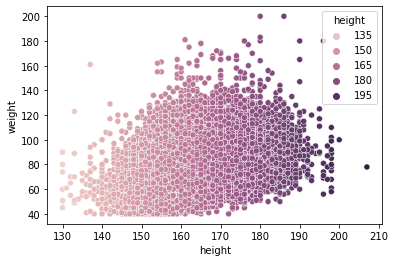

In [22]:
sns.scatterplot( data =Cardio_Disease, x = 'height',y = 'weight', hue = 'height')

#### Check whether there are imbalanced classes

- the target column is cardio_disease_presence which has 0's and 1's, let's check it!

In [23]:
Cardio_Disease['cardio_disease_presence'].value_counts()

0    34942
1    34914
Name: cardio_disease_presence, dtype: int64

- the output shows that the classes are balanced!

## 3. Data Visualization

<AxesSubplot:title={'center':'Age boxplot'}>

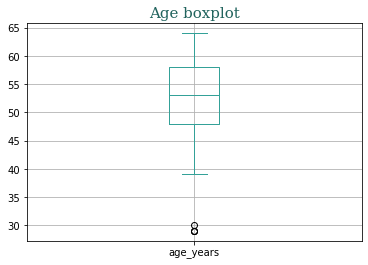

In [24]:
age_boxplot = Cardio_Disease.boxplot(column=['age_years'], color='#34A198')
plt.title("Age boxplot", family='serif',fontsize = 15, color='#21635D')
age_boxplot


(array([4.0000e+00, 0.0000e+00, 1.8730e+03, 4.8310e+03, 7.2510e+03,
        7.6550e+03, 1.3756e+04, 1.0818e+04, 1.3839e+04, 9.8290e+03]),
 array([29. , 32.5, 36. , 39.5, 43. , 46.5, 50. , 53.5, 57. , 60.5, 64. ]),
 <BarContainer object of 10 artists>)

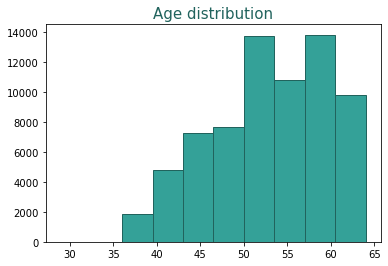

In [25]:
# 21635D
age_hist = plt.hist(Cardio_Disease['age_years'], bins = 10, color='#34A198', edgecolor = '#21635D')
plt.title('Age distribution', color = '#21635D', fontsize = 15)
age_hist

<AxesSubplot:title={'center':'Age boxplot'}>

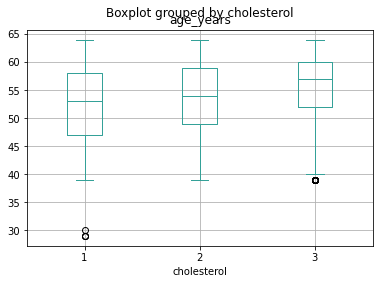

In [26]:
# here is a boxplot for age at each level of cholesterol
cholesterol_age_boxplot = Cardio_Disease.boxplot(by = 'cholesterol' , column=['age_years'], color='#34A198')
age_boxplot


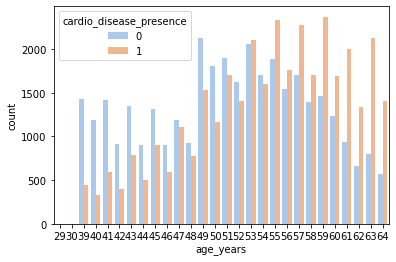

In [27]:
# here is count plot of cardio_disease_presence at each age 
c = sns.color_palette("pastel")
sns.countplot(x= 'age_years' , hue = 'cardio_disease_presence' , data = Cardio_Disease, palette = c)
plt.savefig('cardio_disease_presence_age_years.png')

## 4. Feature Engineering

#### * Blood pressure reading 

In [28]:
# blood_pressure : 1 for normal , 2 for at risk , 3 for High blood pressure
def blood_pressure(s,d):
    if (s <= 120 and d <= 80):
        return 1
    elif (s > 140 and  d > 90 ):
        return 3
    else:
        return 2

In [29]:
Cardio_Disease['Blood_pressure'] = Cardio_Disease.apply(lambda x: blood_pressure(x['Systolic_blood_pressure'], x['Diastolic_blood_pressure']) , axis = 1 )

In [30]:
Cardio_Disease[Cardio_Disease.Blood_pressure == 3].head(3)

,gender,height,weight,Systolic_blood_pressure,Diastolic_blood_pressure,cholesterol,Glucose,smoke,Alcohol_intake,Physical_activity,cardio_disease_presence,age_years,Blood_pressure
3,2,169.0,82.0,150.0,100.0,1,1,0.0,0,1,1,48,3
51,1,169.0,84.0,150.0,100.0,1,1,0.0,0,1,1,50,3
52,2,166.0,85.0,150.0,100.0,1,1,0.0,0,1,1,53,3


#### * Calculate the Body Mass index (BMI)

In [31]:
# the height should be in meters & weight in kilograms 
def BMI(W,H):
    H = H /100 # since the height in cm - I convert it to meters
    return round((W / (H*H)) , 1)

In [32]:
Cardio_Disease['BMI'] = Cardio_Disease.apply(lambda x: BMI(x['weight'], x['height']) , axis = 1 )

In [33]:
Cardio_Disease.head(5)

,gender,height,weight,Systolic_blood_pressure,Diastolic_blood_pressure,cholesterol,Glucose,smoke,Alcohol_intake,Physical_activity,cardio_disease_presence,age_years,Blood_pressure,BMI
0,2,168.0,62.0,110.0,80.0,1,1,0.0,0,1,0,50,1,22.0
1,1,156.0,85.0,140.0,90.0,3,1,0.0,0,1,1,55,2,34.9
2,1,165.0,64.0,130.0,70.0,3,1,0.0,0,0,1,51,2,23.5
3,2,169.0,82.0,150.0,100.0,1,1,0.0,0,1,1,48,3,28.7
4,1,156.0,56.0,100.0,60.0,1,1,0.0,0,0,0,47,1,23.0


## 5. Dataset Preparation

- I'm gonna create a new dataframe & store the tables that I decided to use for model training

In [34]:
col_names = ['gender','age_years','BMI','cholesterol','Glucose','smoke','Alcohol_intake','Physical_activity','Blood_pressure','cardio_disease_presence']
#Cardio_Disease_filtered = Cardio_Disease['gender']
Cardio_Disease_filtered = pd.DataFrame(columns = col_names)
Cardio_Disease_filtered['gender'] = Cardio_Disease['gender']
Cardio_Disease_filtered['age_years'] = Cardio_Disease['age_years']
Cardio_Disease_filtered['BMI'] = Cardio_Disease['BMI']
Cardio_Disease_filtered['cholesterol'] = Cardio_Disease['cholesterol']
Cardio_Disease_filtered['Glucose'] = Cardio_Disease['Glucose']
Cardio_Disease_filtered['smoke'] = Cardio_Disease['smoke']
Cardio_Disease_filtered['Alcohol_intake'] = Cardio_Disease['Alcohol_intake']
Cardio_Disease_filtered['Physical_activity'] = Cardio_Disease['Physical_activity']
Cardio_Disease_filtered['Blood_pressure'] = Cardio_Disease['Blood_pressure']
Cardio_Disease_filtered['cardio_disease_presence'] = Cardio_Disease['cardio_disease_presence']

In [35]:
Cardio_Disease_filtered.shape

(69856, 10)

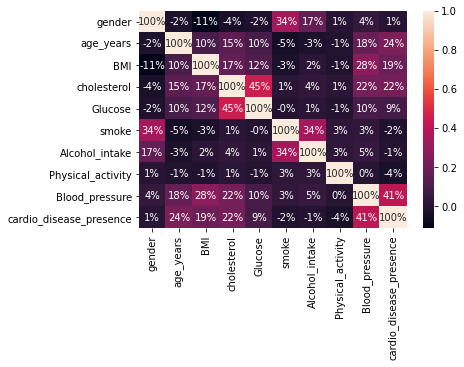

In [36]:
# plot the correlation 
sns.heatmap(Cardio_Disease_filtered.corr(), annot = True, fmt = '.0%')
plt.savefig('Cardio_Disease.corr.png')


The plot above shows that there're correlations between cardio_disease_presence & Blood_pressure, age, BMI and cholesterol

In [37]:
x = Cardio_Disease_filtered.drop(columns = ['cardio_disease_presence'], axis = 1)
y = Cardio_Disease_filtered['cardio_disease_presence']

In [38]:
x.head()

,gender,age_years,BMI,cholesterol,Glucose,smoke,Alcohol_intake,Physical_activity,Blood_pressure
0,2,50,22.0,1,1,0.0,0,1,1
1,1,55,34.9,3,1,0.0,0,1,2
2,1,51,23.5,3,1,0.0,0,0,2
3,2,48,28.7,1,1,0.0,0,1,3
4,1,47,23.0,1,1,0.0,0,0,1


In [39]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size = 0.20, random_state=20)

## 6. Model Selection and Development

   ### 6.1 Logistic Regression 

In [67]:
logistic_model = LogisticRegression() 

### 6.2 Random Forest Classifier

In [68]:
Random_Forest = RandomForestClassifier(n_estimators=100)

## 7. Training

#### Data Scaling

In [69]:
# scale the data for the logistic regression model
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.fit_transform(X_test)

### 7.1 Logistic Regression Training

In [70]:
# train the Logistic Regression model

logistic_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [71]:
logistic_model.coef_

array([[ 0.03802472,  0.3652388 ,  0.16512981,  0.32164073, -0.05769022,
        -0.03841251, -0.05879746, -0.07838981,  0.83565389]])

In [72]:
logistic_model.intercept_

array([0.04412341])

### 7.2 Random Forest Classifier Training

In [73]:
# train the Random Forest Classifier model
Random_Forest.fit(X_train,y_train)

RandomForestClassifier()

## 8. Evaluation

### 8.1 Logistic Regression Evaluation

In [74]:
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logistic_model.score(X_train_scaled, y_train)))
print("Test set: {:6.2f}%".format(100*logistic_model.score(X_test_scaled, y_test)))

The score for logistic regression is
Training:  71.72%
Test set:  71.25%


In [75]:
# get the probabilities of being in class 0 or 1 for each row in test set

y_probab_predict = logistic_model.predict_proba(X_test_scaled)

In [76]:
y_probab_predict

array([[0.35775982, 0.64224018],
       [0.31308709, 0.68691291],
       [0.10599774, 0.89400226],
       ...,
       [0.30197708, 0.69802292],
       [0.7483873 , 0.2516127 ],
       [0.10663975, 0.89336025]])

In [77]:
y_predict = logistic_model.predict(X_test_scaled)

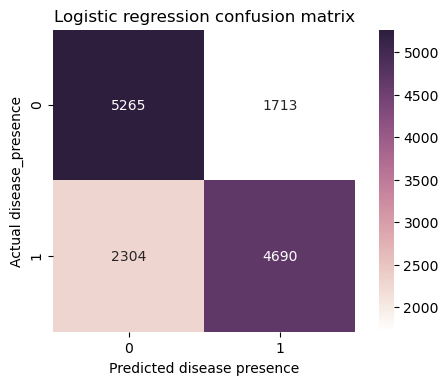

In [99]:
# plot the confusion matrix for random forest 

logistic_model_confusion = confusion_matrix(y_test, y_predict)

plt.figure(dpi=100)
cmap = sns.cubehelix_palette(light = 1 , as_cmap = True)
sns.heatmap(logistic_model_confusion, cmap=cmap,  annot=True, square=True, fmt ='g')

plt.xlabel('Predicted disease presence')
plt.ylabel('Actual disease_presence')
plt.title('Logistic regression confusion matrix');
plt.savefig('logistic_model_confusion.png')

In [79]:
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))

Precision: 0.7325,   Recall: 0.6706


In [80]:
# create the roc_curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_probab_predict[:,1])

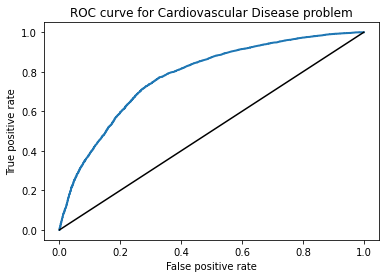

In [95]:
# the following code is for plotting the ROC curve for the logistic regression

plt.plot(false_positive_rate, true_positive_rate,lw=2)
plt.plot([0,1],[0,1],c='black',ls='-')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for Cardiovascular Disease problem');
plt.savefig('ROC_curve_LR.png')

In [82]:
print("ROC AUC score = ", roc_auc_score(y_test, y_probab_predict[:,1]))

ROC AUC score =  0.7791388852075066


#### Accuuracy with K-fold cross validation for logistic regression

In [83]:
kf = KFold(n_splits=10, shuffle=True, random_state = 42)

In [84]:
accuracies = cross_val_score(estimator = logistic_model, X = X_train_scaled, y = y_train , cv = kf) 
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

Accuracy: 71.71 %


### 8.2 Random Forest Classifier Evaluation

In [85]:
print("The score for Random Forest Classifier is")
print("Training: {:6.2f}%".format(100*Random_Forest.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*Random_Forest.score(X_test, y_test)))

The score for Random Forest Classifier is
Training:  89.58%
Test set:  66.34%


In [86]:
# predict the target column for the x test 
y_predict_rf = Random_Forest.predict(X_test)

In [103]:
print("Random Forest Classifier: ")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict_rf), 
                                                     recall_score(y_test, y_predict_rf)))

Random Forest Classifier: 
Precision: 0.6640,   Recall: 0.6631


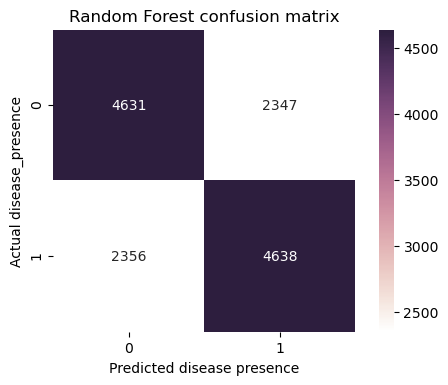

In [96]:
# plot the confusion matrix for random forest 
Random_Forest_model_confusion = confusion_matrix(y_test, y_predict_rf)

plt.figure(dpi=100)
cmap = sns.cubehelix_palette(light = 1 , as_cmap = True)
sns.heatmap(Random_Forest_model_confusion, cmap=cmap,  annot=True, square=True, fmt ='g')

plt.xlabel('Predicted disease presence')
plt.ylabel('Actual disease_presence')
plt.title('Random Forest confusion matrix');
plt.savefig('Random_Forest_model_confusion.png')

In [89]:
# get the probabilities of being in class 0 or 1 for each row in test set
y_probab_predict_rf = Random_Forest.predict_proba(X_test_scaled)

In [90]:
# create the roc_curve
false_positive_rate_rf, true_positive_rate_rf, thresholds_rf = roc_curve(y_test, y_probab_predict_rf[:,1])

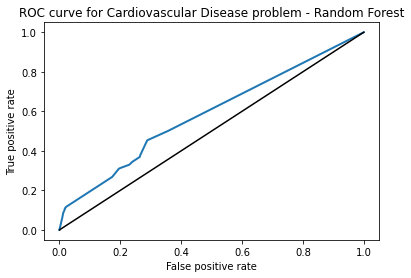

In [97]:
# the following code is for plotting the ROC curve for the random forest 

plt.plot(false_positive_rate_rf, true_positive_rate_rf,lw=2)
plt.plot([0,1],[0,1],c='black',ls='-')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for Cardiovascular Disease problem - Random Forest');
plt.savefig('ROC_curve_RF.png')

In [92]:
# print the area under the curve for for Random Forest
print("ROC AUC score for Random Forest= ", roc_auc_score(y_test, y_probab_predict_rf[:,1]))

ROC AUC score =  0.5853301417183282


#### Accuuracy with K-fold cross validation for random forest

In [93]:
accuracies_rf = cross_val_score(estimator = Random_Forest, X = X_train, y = y_train , cv = kf) 
print("Accuracy: {:.2f} %".format(accuracies_rf.mean()*100))

Accuracy: 66.08 %


#### -